# Homework 2 Regression Refresher

In class, we considered a very simply algorithm called gradient descent that we used to estimate the parameters of a simple linear model. But we left many considerations open. These include:
- Normalization 
    - We saw that the SSE is a very big number in our example, leading us to choose awkwardly small learning rates. Normaling the error may help us use more reasonably sized learning rates.
- When to stop
    - We can tell the algorithm to stop after a set number of iterations or, something smarter, tell it to stop when it begins to take very small step sizes
- Multiple solutions
    - It should be obvious that gradient descent, as an algorithm, doesn't do much "thinking". 
    - If there are multiple solutions, it will only find one
        

## Problem 1 - Use gradient descent to identify multiple minima

Regression algorithms ultimately search for minima. This can be where an error function is minimized (as we saw in class) or when a polynomial equation is minimized. Using the code from our lecture, adapt the code in order to indentify the roots of the following equation: 

$x^3 - 6x^2 +11x = 6$
  
- Look at homework 1 for how to tackle this problem.
- Since the polynomial will have more than 1 solution, be sure to consider multiple starting guesses. 
- Use the "roots" function from numpy to check your answer. Roots is especially designed for polynomials and should find all roots.

In [32]:
#importing required packages
import scipy
import numpy as np
import math
import matplotlib.pyplot as plt


Our first root is  2.9948263309572556  with SSE 0.0001054149033069905


Text(0, 0.5, 'Sum of Squared Error')

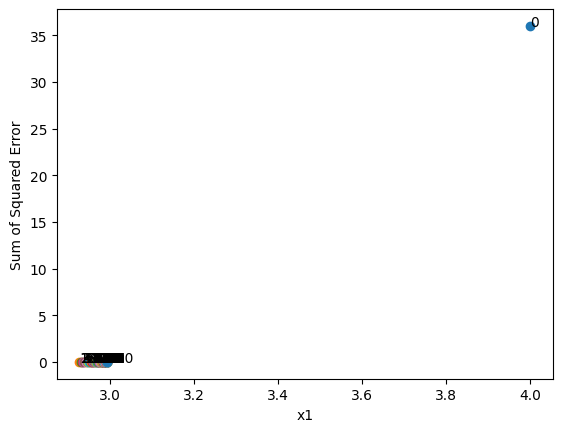

In [33]:
#defining error function as the polynomial and mimimizing it
def SSE(x):
    predicted_solution = x**3-6*x*x+11*x;
    err = predicted_solution - 6;
    SSE = np.sum(err**2);
    return SSE;

def derivative(x):
    DERIVATIVE = (SSE(x+0.01)-SSE(x))/0.01; 
    return DERIVATIVE

#guess value 1 for first root
n = 0 
current_x1 = 4
rate = 0.001*8

# Plot our initial guess' SSE and label zero
plt.plot(current_x1, SSE(current_x1),'o')
plt.text(current_x1, SSE(current_x1),n)



while n < 100:
    new_x1 = current_x1 - rate * derivative(current_x1)
    current_x1=new_x1
    n = n + 1
    plt.plot(new_x1, SSE(new_x1),'o')
    plt.text(new_x1, SSE(new_x1),n)
    
print("Our first root is ", new_x1, " with SSE", SSE(new_x1))
plt.xlabel("x1")
plt.ylabel("Sum of Squared Error")


Our first root is  1.9950000000841737  with SSE 2.499874917396586e-05


Text(0, 0.5, 'Sum of Squared Error')

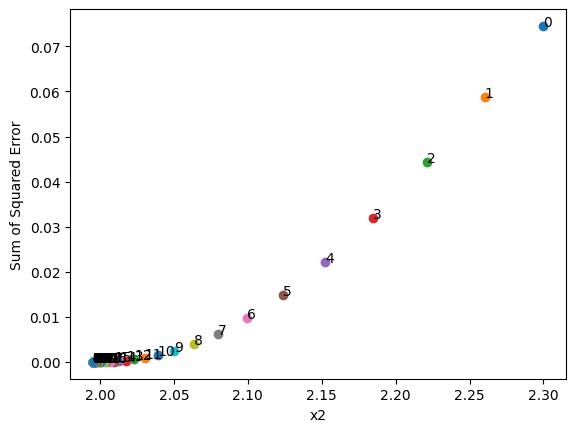

In [34]:
#guess value 2 for second root
n = 0 
current_x2 = 2.3
rate = 0.1

# Plot our initial guess' SSE and label zero
plt.plot(current_x2, SSE(current_x2),'o')
plt.text(current_x2, SSE(current_x2),n)



while n < 100:
    new_x2 = current_x2 - rate * derivative(current_x2)
    current_x2 = new_x2
    n = n + 1
    plt.plot(new_x2, SSE(new_x2),'o')
    plt.text(new_x2, SSE(new_x2),n)
    
print("Our first root is ", new_x2, " with SSE", SSE(new_x2))
plt.xlabel("x2")
plt.ylabel("Sum of Squared Error")

Our first root is  0.9950101777973495  with SSE 0.00010109223869314493


Text(0, 0.5, 'Sum of Squared Error')

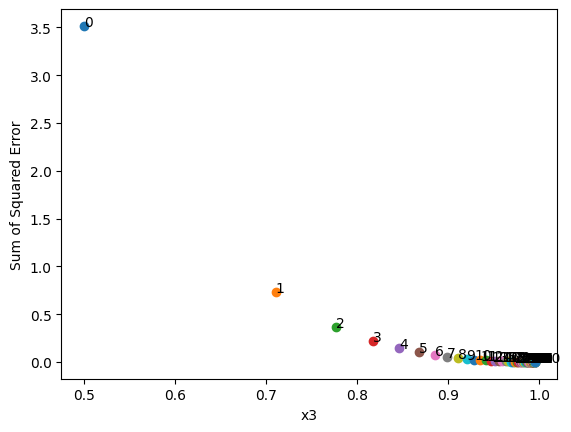

In [35]:
#guess value 3 for third root
n = 0 
current_x3 = 0.5
rate = 0.01

# Plot our initial guess' SSE and label zero
plt.plot(current_x3, SSE(current_x3),'o')
plt.text(current_x3, SSE(current_x3),n)



while n < 100:
    new_x3 = current_x3 - rate * derivative(current_x3)
    current_x3 = new_x3
    #print(current_x)
    n = n + 1
    plt.plot(new_x3, SSE(new_x3),'o')
    plt.text(new_x3, SSE(new_x3),n)
    
print("Our first root is ", new_x3, " with SSE", SSE(new_x3))
plt.xlabel("x3")
plt.ylabel("Sum of Squared Error")

In [36]:
#defining a function with given polynomial
def polynomial(x1):
    equation=x1**3-6*x1*x1+11*x1-6
    return equation

In [37]:
#testing roots function
p=[1,-6,11,-6]#polynomial coefficients
print(np.roots(p))

[3. 2. 1.]


## Problem 2 - Linear regression can be used to analyze "groups"

In class, we used linear regression to fit a linear model to height and weight data. In this case, the measurements (x) and the outcomes (y) are continuous. Linear regression is also commonly used to analyze groups, wherein the measurements are not continous. For example, we may have measured the height of persons who did or did not eat asparagus when they were young. In this case, x is discrete - a collection of 1's and 0's. 

Let's use linear regression to analyze the miles per gallon achieved by select type of cars. Download the data from https://gist.github.com/noamross/e5d3e859aa0c794be10b. We want to determine if 8 cylinder vehicles get less gas mileage than 4 and 6 cylinder cars. Cyl = cylinders; MPG = miles per gallon on the table.

### a) Write the code to determine the average MPG for 8 cylinder vehicles vs 4/6 cyl vehicle.
Be sure the mean values are clearly identified or report them in a new markup cell below the code. Be sure that you are treating 4 and 6 cyl vehicles as one group.

In [38]:
import pandas as pd
dat=pd.read_csv("cars.csv", skiprows=0) #using data frames to read csv file
dat

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [39]:
#grouping the data into 4 or 6 cylinders and 8 cylinders
dat.loc[dat['cyl'] <= 6, 'group'] = 0 
dat.loc[dat['cyl'] > 6, 'group'] = 1 
dat

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,group
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1.0
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0.0
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1.0
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,0.0
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,0.0
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,0.0


In [40]:
#data for cylinders 4 or 6
dat1 = dat.loc[dat['group'] == 0]
dat1

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,group
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.0
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0.0
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,0.0
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,0.0
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,0.0
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4,0.0
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,0.0


In [41]:
#Mean of data with 4 or 6 cylinders
mpg1=dat1["mpg"]
avg_mpg1=round(sum(mpg1)/len(mpg1),2)
print("Mean of mpg with car cylinders 4 or 6 is",avg_mpg1)

Mean of mpg with car cylinders 4 or 6 is 23.97


In [42]:
#Data with 8 cylinders
dat2 = dat.loc[dat['group'] == 1]
dat2

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,group
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1.0
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1.0
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3,1.0
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3,1.0
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3,1.0
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,1.0
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,1.0
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,1.0
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2,1.0
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2,1.0


In [43]:
#Mean of data with 8 cylinders
mpg2=dat2["mpg"]
avg_mpg2=round(sum(mpg2)/len(mpg2),2)
print("Mean of mpg with car cylinders 8 is",avg_mpg2)

Mean of mpg with car cylinders 8 is 15.1


### b) Analyze using linear regression
To analyze with linear regression, we have to create a linear model. Here, our y is the MPG. But x is not a continous variable - it's a group variable. 

- Let's create a "Group" column in our data, where a 1 indicates that a vehicle has a 8 cyl engine and a 0 to indicate a 4 or 6 cylinder vehicle. 
- Use the linear regression **mathematical code** (do not use packages; perform the matrix algrebra) from class to calculate the slope and intercept. Feel free to check your answer using on the packages demonstrated in class.
- Report the slope and intercept in a text box below your code. 
- In the text box, also compare the calculated slope and intercept to the values of the means calculated above. Do you notice any obvious relationships?



In [44]:
#Displaying data with groups (Note: groups created in previous 2a)
dat

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,group
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1.0
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0.0
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1.0
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,0.0
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,0.0
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,0.0


In [45]:
#Using linear regression with matrix algebra to calculate slope and intercept

datmpg = np.array(dat["mpg"]);
cylinder = np.array(dat["group"]);

X = np.c_[np.ones(len(cylinder)),cylinder]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

INTERCEPT, SLOPE = tmp @ np.transpose(X) @ mpg
print("Our intercept is ",INTERCEPT, "and our slope is", SLOPE)




Our intercept is  23.972222222222218 and our slope is -8.87222222222222


In [46]:
#Checking the slope and intercept using statsmodel.api package

import statsmodels.api as sm
model = sm.OLS(mpg, sm.add_constant(cylinder)).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     36.74
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           1.17e-06
Time:                        23:53:58   Log-Likelihood:                -89.584
No. Observations:                  32   AIC:                             183.2
Df Residuals:                      30   BIC:                             186.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9722      0.968     24.761      0.0

The intercept is the average value of mpg at group 0 (which is cars with 4 or 6 cylinders) and the slope is the difference between the averages is both cases, group 0 and group 1 (which is cars with 8 cylinders)